In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def rotate_array(l,x):
  return np.concatenate((l[-x:],l[:-x]),axis=0)

In [3]:
divisions = 1024

phi = np.arange(0,2*np.pi,(2*np.pi)/divisions)
len(phi)

1024

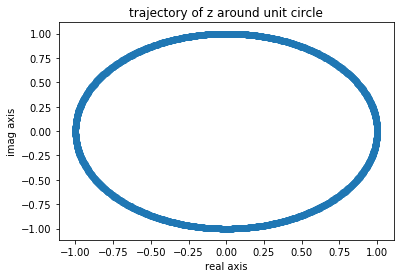

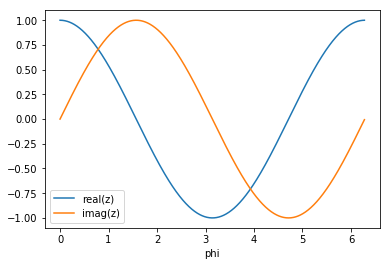

In [4]:
##################################################
##          z goes around unit circle           ##
##################################################


z = np.exp(phi*1j)

plt.title("trajectory of z around unit circle")
plt.scatter(np.real(z),np.imag(z))
plt.xlabel("real axis")
plt.ylabel("imag axis")
plt.show()

plt.plot(phi,np.real(z),label="real(z)")
plt.plot(phi,np.imag(z),label="imag(z)")
plt.xlabel("phi")
plt.legend()
plt.show()

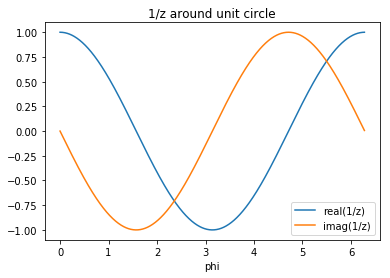

In [5]:
##################################################
##                  f(z) = 1/z                  ##
##################################################


#f = lambda z:1/z

f = 1/z

plt.plot(phi,np.real(f),label="real(1/z)")
plt.plot(phi,np.imag(f),label="imag(1/z)")
plt.title("1/z around unit circle")
plt.xlabel("phi")
plt.legend()
plt.show()

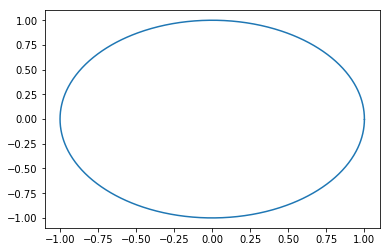

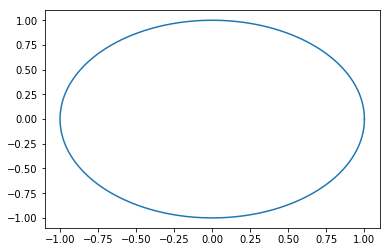

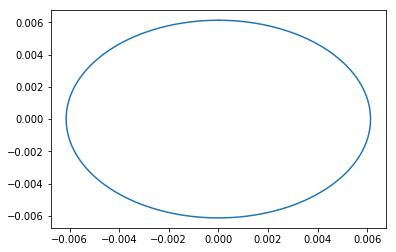

In [6]:
##################################################
##             the differential: dz             ##
##################################################

a = rotate_array(z,-1)

plt.plot(np.real(z),np.imag(z))
plt.show()
plt.plot(np.real(a),np.imag(a))
plt.show()

dz = a - z
plt.plot(np.real(dz),np.imag(dz))
plt.show()

In [7]:
##################################################
##        the numerical complex integral        ##
##################################################

I = 0

for i in range(0,len(phi)):
  I += f[i]*dz[i]

I

(-0.019276510616429897+6.2831458807342697j)

In [64]:
##################################################
##        derivative via cauchy formula         ##
##################################################


def cauchy(f,p,n,**kwargs): # n is the derivative
  radius = kwargs.get("radius",1.)
  divisions = kwargs.get("divisions",128)
  phi = np.arange(0,2*np.pi,(2*np.pi)/divisions)
  z = p + radius*np.exp(phi*1j)
  dz = rotate_array(z,-1) - z
  return np.math.factorial(n) * 1/(2*np.pi*1j) * np.sum(  f(z)*dz * 1/((z-p)**(n+1)) )

$$ \frac{n!}{2\pi i} \oint \frac{f(z)}{(z-p)^{n+1}}dz = f^{(n)}(p) $$

<function matplotlib.pyplot.show(*args, **kw)>

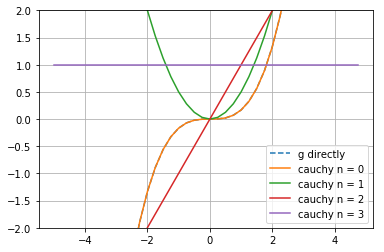

In [69]:
#g = lambda x : x**4
#g = lambda x : np.sin(x)
g = lambda x : 1/2*1/3*x**3

x = np.arange(-5,5,0.25)

# parameter n is the derivative, i.e. n=0 is the function itself

plt.plot(x,g(x),"--", label="g directly")

divisions = 64

cauchy_g0 = np.array([ cauchy(g,x,0,divisions=divisions) for x in x])
cauchy_g1 = np.array([ cauchy(g,x,1,divisions=divisions) for x in x])
cauchy_g2 = np.array([ cauchy(g,x,2,divisions=divisions) for x in x])
cauchy_g3 = np.array([ cauchy(g,x,3,divisions=divisions) for x in x])

plt.plot(x,cauchy_g0,label="cauchy n = 0")
plt.plot(x,cauchy_g1,label="cauchy n = 1")
plt.plot(x,cauchy_g2,label="cauchy n = 2")
plt.plot(x,cauchy_g3,label="cauchy n = 3")

plt.ylim(-2,2)
plt.grid(True)

plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

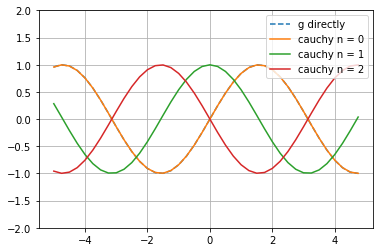

In [67]:
#g = lambda x : x**4
g = lambda x : np.sin(x)
#g = lambda x : 0.5*x**2

x = np.arange(-5,5,0.25)

# parameter n is the derivative, i.e. n=0 is the function itself

plt.plot(x,g(x),"--", label="g directly")

divisions = 64

cauchy_g0 = np.array([ cauchy(g,x,0,divisions=divisions) for x in x])
cauchy_g1 = np.array([ cauchy(g,x,1,divisions=divisions) for x in x])
cauchy_g2 = np.array([ cauchy(g,x,2,divisions=divisions) for x in x])

plt.plot(x,cauchy_g0,label="cauchy n = 0")
plt.plot(x,cauchy_g1,label="cauchy n = 1")
plt.plot(x,cauchy_g2,label="cauchy n = 2")

plt.ylim(-2,2)
plt.grid(True)

plt.legend()
plt.show